In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Colum descriptions: 

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

In [30]:
vgdf = pd.read_csv("vgsales.csv")
vgdf.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [31]:
vgdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


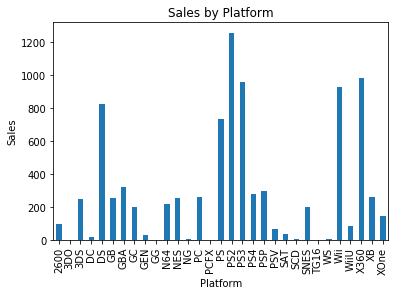

In [32]:
vgdf.groupby(["Platform"])["Global_Sales"].sum().plot(kind="bar", title = "Sales by Platform")
plt.ylabel("Sales")
plt.show()

# Genre Analysis

To start, I will plot the sum of sales by Genre

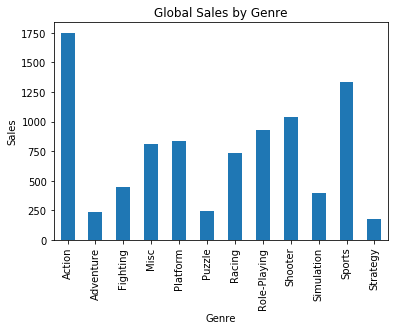

In [33]:
vgdf.groupby(["Genre"])["Global_Sales"].sum().plot(kind="bar", title = "Global Sales by Genre")
plt.ylabel("Sales")
plt.show()

As this takes into account datat from decades pased, I will re plot it but filtering to show the latest years to gain a better view on what is popular now.

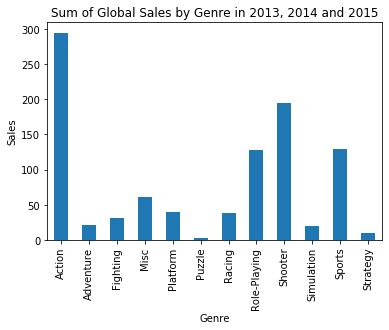

In [34]:
vgdf_filtered_by_year = vgdf[vgdf["Year"].isin([2013, 2014, 2015])]
vgdf_filtered_by_year.groupby(["Genre"])["Global_Sales"].sum().plot(kind="bar", title = "Sum of Global Sales by Genre in 2013, 2014 and 2015")
plt.ylabel("Sales")
plt.show()

Seeing that Action and Shooter type games are both very popular, I wish to compare these two by plotting a line chart with this two categories based on years.

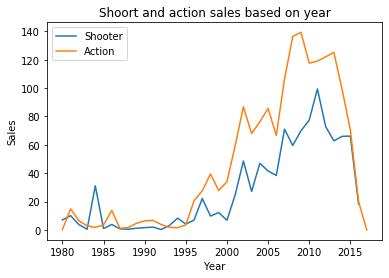

In [71]:
vgdf_filtered_by_genre = vgdf[vgdf["Genre"] == "Shooter"]
vgdf_filtered_by_genre.groupby(["Year"])["Global_Sales"].sum().plot(kind="line", label = "Shooter")

vgdf_filtered_by_genre = vgdf[vgdf["Genre"] == "Action"]
vgdf_filtered_by_genre.groupby(["Year"])["Global_Sales"].sum().plot(kind="line", label = "Action")

plt.title("Shoort and action sales based on year")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Publisher analysis

Another important decision is which publisher to go for. As they are many publishers, I will limit the plot to only conaitn the top 10 publishers based on the sum of global sales.

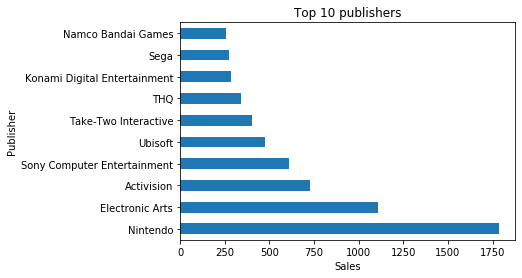

In [72]:
top_10_publishers = vgdf.groupby(["Publisher"])["Global_Sales"].sum().sort_values(ascending = False).head(10)
top_10_publishers.plot(kind="barh", title = "Top 10 publishers")
plt.xlabel("Sales")
plt.show()

To gain some futher insight into what the XBOX buyers enjoy, I will filter and plot the top 10 publishers for the XBOX360.

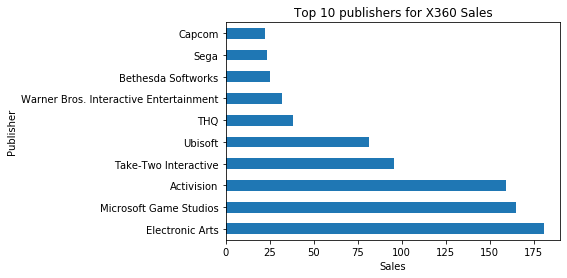

In [73]:
top_10_publishers = vgdf[vgdf["Platform"] == "X360"].groupby(["Publisher"])["Global_Sales"].sum().sort_values(ascending = False).head(10)
top_10_publishers.plot(kind="barh", title = "Top 10 publishers for X360 Sales")
plt.xlabel("Sales")
plt.show()

# Top games analysis

I wish to understand a bit about the top rated games.

In [39]:
vgdf.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Because Nintendo only develops games for their own consoles, and also their audience is vastly different to that of the XBOX I will exclude them from the analysis, as many of the top ranked games are theirs.

In [40]:
vgdf[vgdf["Publisher"] != "Nintendo"].head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
28,29,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03


# Data science exploration

For the data science team, it is important to understand more about the data, as that is what they will work with.

In [41]:
vgdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [42]:
vgdf.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


One of the key visualizations when considering performing modeling on a dataset is the correlation matrix. Even though it is not extrictly necessary to reach the conclusions of this exploration, it is good to understand how successfull we might be in performing predictions.

To include the 4 categorical columns, I have taken the liberty to encode them into numbers (in a very naive way as this is out of scope).

In [75]:
vgdf["Publisher"] = vgdf["Publisher"].astype("category")
vgdf["Publisher_cat"] = vgdf["Publisher"].cat.codes

vgdf["Platform"] = vgdf["Platform"].astype("category")
vgdf["Platform_cat"] = vgdf["Platform"].cat.codes

vgdf["Genre"] = vgdf["Genre"].astype("category")
vgdf["Genre_cat"] = vgdf["Genre"].cat.codes

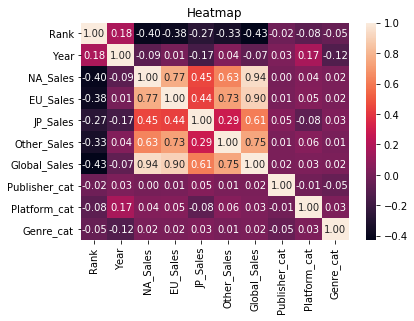

In [76]:
ax = sns.heatmap(vgdf.corr(), annot=True, fmt='.2f')
ax.set_title("Heatmap")
plt.show()

It is also worth sharing the counts per categorical column to understand the distribution of the data. 

While I am not a fan of pie charts, and there is academic documentation on how humans understand better lineraly, I take the liberty to show these to the DS team as they are more used to seeing these types of visualizations. 

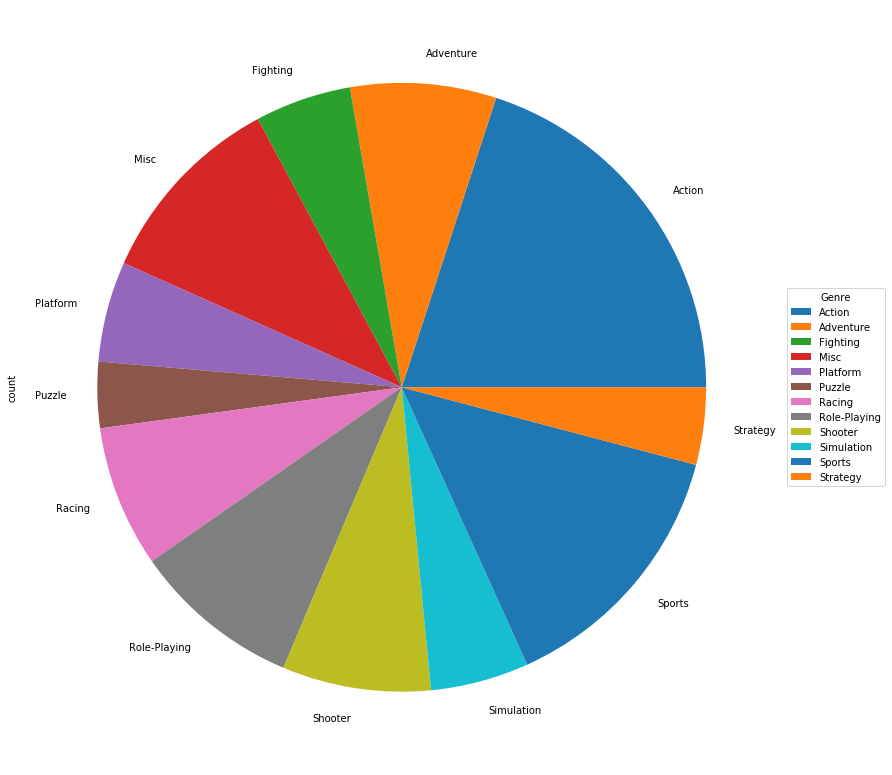

In [61]:
plot = pd.DataFrame(vgdf.groupby("Genre").Rank.count())
plot = plot.rename(columns={"Rank": "count"})

plot.plot.pie(y='count', figsize=(14, 14)).legend(title="Genre", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

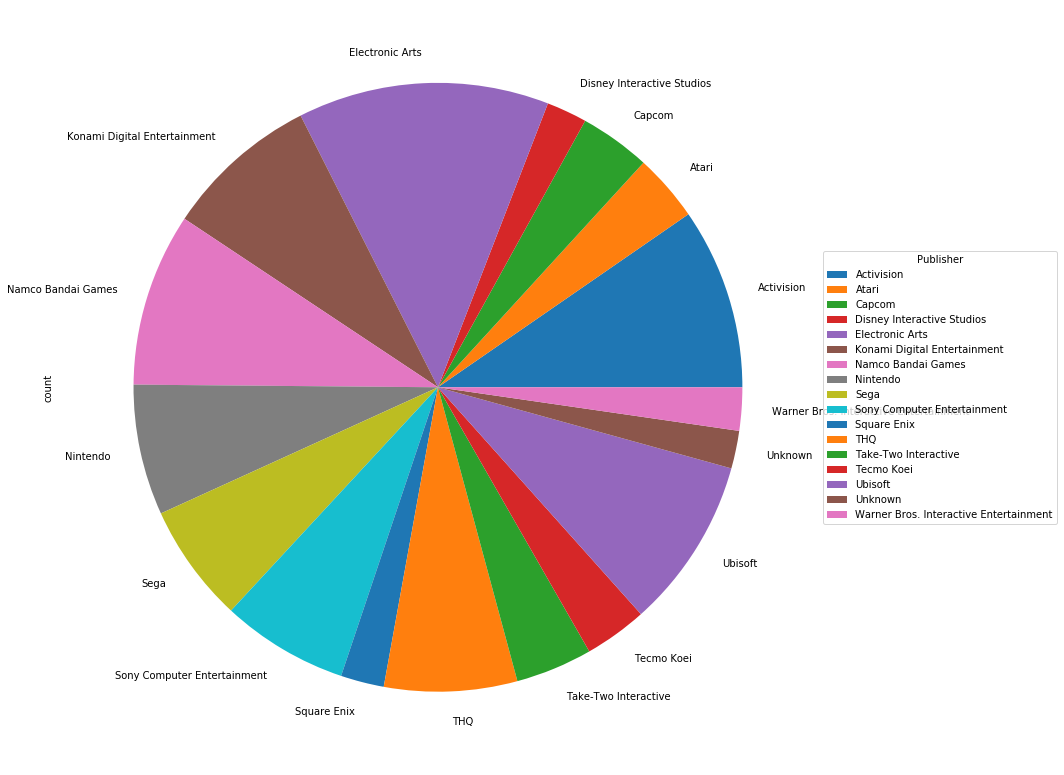

In [78]:
vgdf_publisher = pd.DataFrame(vgdf.groupby("Publisher").Rank.count())
vgdf_publisher = vgdf_publisher.rename(columns={"Rank": "count"})

vgdf_publisher = vgdf_publisher.loc[vgdf_publisher["count"] > 200]
vgdf_publisher.plot.pie(y='count', figsize=(14, 14)).legend(title="Publisher", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

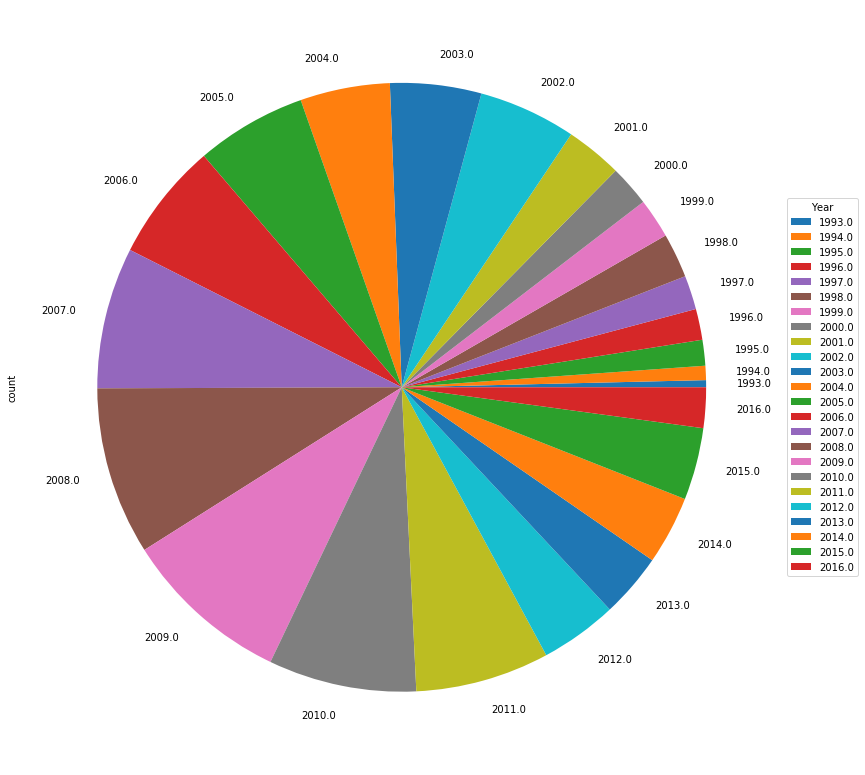

In [79]:
vgdf_year = pd.DataFrame(vgdf.groupby("Year").Rank.count()).reset_index()
vgdf_year = vgdf_year.rename(columns={"Rank": "count"})

vgdf_year = vgdf_year.loc[vgdf_year["count"] > 50]
vgdf_year.index = vgdf_year["Year"]
vgdf_year = vgdf_year.drop("Year", axis=1)

vgdf_year.plot.pie(y='count', figsize=(14, 14)).legend(title="Year", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

Finally, even though this plot contains too much information to be properly explored in the slides, pairplot is super useful to show relationships between all variables. 

As there are quite a few columns, I have only displayed those that are most interesting for out analysis.

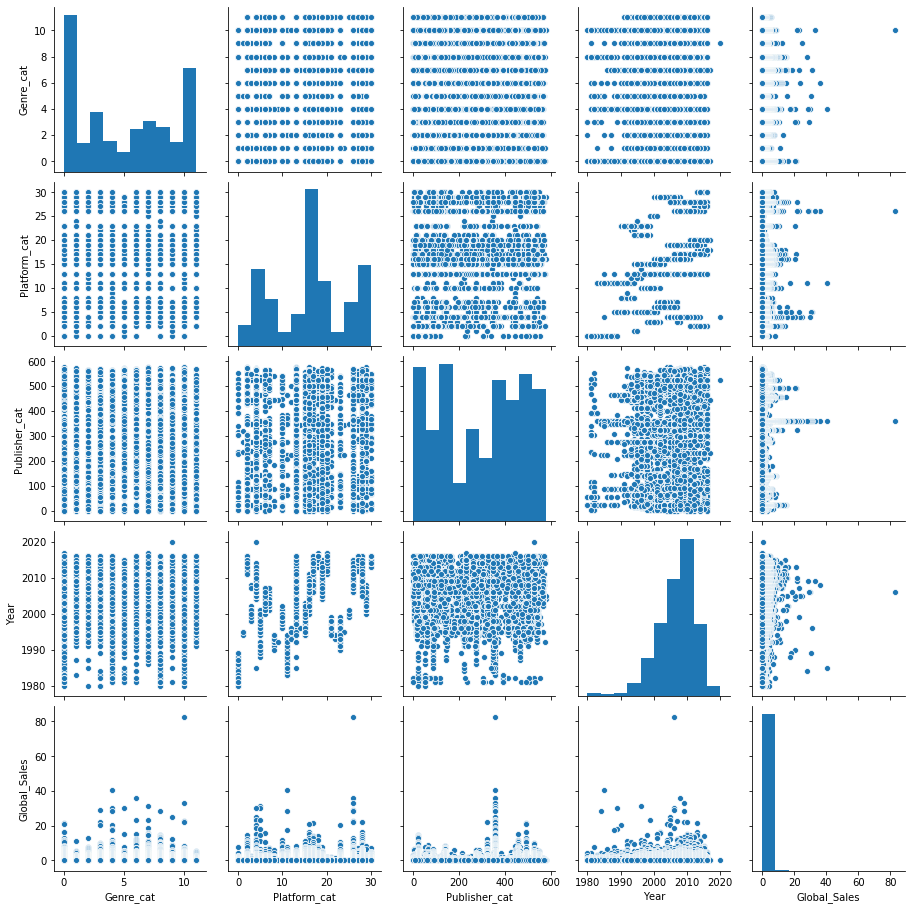

In [89]:
sns.pairplot(vgdf[["Genre_cat", "Platform_cat", "Publisher_cat", "Year", "Global_Sales"]])